In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import pandas as pd
import seaborn as sns
import pickle

from sklearn.decomposition import PCA, TruncatedSVD

In [5]:
#load everything
num_ing = 8023
num_items = 8576
num_rec = 178265
recipe_decoder = pickle.load( open('data-cleaned/recipe_decoder.pkl', 'rb') )
ingr_decoder   = pickle.load( open('data-cleaned/ingredient_decoder.pkl', 'rb') )
tag_decoder    = pickle.load( open('data-cleaned/tag_decoder.pkl', 'rb') )
R     = sparse.load_npz("data-cleaned/recipes.npz")
Rhat  = sparse.load_npz("data-cleaned/recipes_tfidf.npz")
U     = sparse.load_npz("data-cleaned/user_train.npz")
Uhat  = sparse.load_npz("data-cleaned/user_train_tfidf.npz")
Utest = sparse.load_npz("data-cleaned/user_test.npz")
col_sum = np.load("data-cleaned/recipe_col_sum.npy")
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 

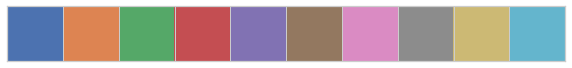

In [6]:
#set colors
sns.set(style="whitegrid", palette="deep")
sns.palplot(sns.color_palette())

In [7]:
R_colsum = R.sum(axis=1)
U_colsum = U[:,:-1].astype('bool').sum(axis=1)+1

## Distribution Plots

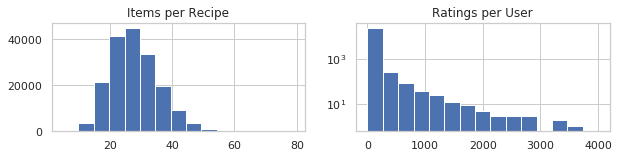

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10,2))

#plot
sns.distplot(R_colsum, ax=ax[0], kde=False, bins=15, hist_kws={"alpha": 1})
sns.distplot(U_colsum, ax=ax[1], kde=False, bins=15, hist_kws={"range": [0,4000], "alpha": 1})
ax[1].set(yscale="log")

#label
ax[0].set_title("Items per Recipe")
ax[1].set_title("Ratings per User")
plt.savefig("figs/dist.pdf", bbox_inches="tight")
plt.show()

## PCA Analysis

In [14]:
Rhat_pca = TruncatedSVD(n_components=200)
Rhat_pca.fit(Rhat)

R_pca = TruncatedSVD(n_components=200)
R_pca.fit(R)

TruncatedSVD(algorithm='randomized', n_components=200, n_iter=5,
             random_state=None, tol=0.0)

In [15]:
Uhat_pca = TruncatedSVD(n_components=200)
Uhat_pca.fit(Uhat)

U_pca = TruncatedSVD(n_components=200)
U_pca.fit(U)

TruncatedSVD(algorithm='randomized', n_components=200, n_iter=5,
             random_state=None, tol=0.0)

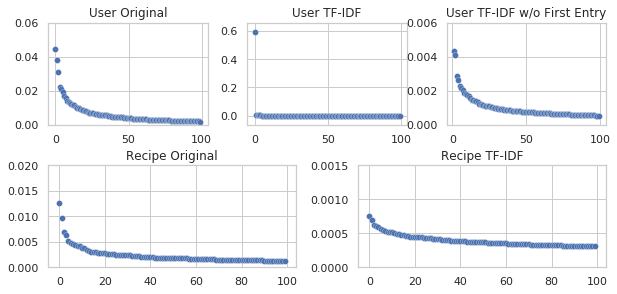

In [16]:
fig = plt.figure(figsize=(10,4.5))
ax0 = plt.subplot(2,3,1)
ax1 = plt.subplot(2,3,2)
ax2 = plt.subplot(2,3,3)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

sns.scatterplot(np.arange(100), sorted(R_pca.explained_variance_ratio_[:100])[::-1], ax=ax0, alpha=1, linewidth=0.25)
ax0.set_title("User Original")
ax0.set_ylim([0,.06])

sns.scatterplot(np.arange(100), sorted(Rhat_pca.explained_variance_ratio_[:100])[::-1], ax=ax1, alpha=1, linewidth=0.25)
ax1.set_title("User TF-IDF")

sns.scatterplot(np.arange(1,100), sorted(Rhat_pca.explained_variance_ratio_[1:100])[::-1], ax=ax2, alpha=1, linewidth=0.25)
ax2.set_title("User TF-IDF w/o First Entry")
ax2.set_ylim([0,.006])

sns.scatterplot(np.arange(100), sorted(U_pca.explained_variance_ratio_[:100])[::-1], ax=ax3, alpha=1, linewidth=0.25)
ax3.set_title("Recipe Original")
ax3.set_ylim([0,.02])

sns.scatterplot(np.arange(100), sorted(Uhat_pca.explained_variance_ratio_[:100])[::-1], ax=ax4, alpha=1, linewidth=0.25)
ax4.set_title("Recipe TF-IDF")
ax4.set_ylim([0,.0015])

plt.subplots_adjust(hspace=0.4, wspace=0.25)
plt.savefig("figs/pca.pdf", bbox_inches="tight")
plt.show()